In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import zscore
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

In [ ]:
df = pd.read_excel('/content/qatar-monthly-statistics-visitor-arrivals-by-mode-of-enteryecxel.xlsx')

In [ ]:
df

,Month,Air,Land,Sea,Total Visitor Arrivals
0,2024-11,280402,208687,31479,520568
1,2024-03,196297,77090,55619,329006
2,2024-01,289633,327509,85666,702808
3,2023-12,270745,155378,92733,518856
4,2023-09,169986,75631,1500,247117
...,...,...,...,...,...
78,2019-03,495011,0,93061,588072
79,2019-01,163026,0,33568,196594
80,2018-08,1153300,0,55718,1209018
81,2018-02,316957,0,30667,347624


In [ ]:
df.rename(columns={
    ' Air': 'Air Arrivals',
    ' Land': 'Land Arrivals',
    ' Sea': 'Sea Arrivals',
    '  Total Visitor Arrivals': 'Total Visitor Arrivals'
}, inplace=True)


df.head()


,Month,Air Arrivals,Land Arrivals,Sea Arrivals,Total Visitor Arrivals
0,2024-11,280402,208687,31479,520568
1,2024-03,196297,77090,55619,329006
2,2024-01,289633,327509,85666,702808
3,2023-12,270745,155378,92733,518856
4,2023-09,169986,75631,1500,247117


In [ ]:
df["Month"] = df["Month"].astype(str)

# Now, you can split the 'Month' column
df[['Year', 'Month']] = df["Month"].str.split("-", expand=True)
df


,Month,Air Arrivals,Land Arrivals,Sea Arrivals,Total Visitor Arrivals,Year
0,11,280402,208687,31479,520568,2024
1,03,196297,77090,55619,329006,2024
2,01,289633,327509,85666,702808,2024
3,12,270745,155378,92733,518856,2023
4,09,169986,75631,1500,247117,2023
...,...,...,...,...,...,...
78,03,495011,0,93061,588072,2019
79,01,163026,0,33568,196594,2019
80,08,1153300,0,55718,1209018,2018
81,02,316957,0,30667,347624,2018


In [ ]:
df.columns

In [ ]:
df['Year'].unique()

array(['2024', '2023', '2022', '2021', '2020', '2019', '2018'],
      dtype=object)

In [ ]:
correlation_matrix = df[['Air Arrivals', 'Land Arrivals', 'Sea Arrivals', 'Total Visitor Arrivals']].corr()

# Display the correlation matrix
correlation_matrix

,Air Arrivals,Land Arrivals,Sea Arrivals,Total Visitor Arrivals
Air Arrivals,1.000000,-0.332987,0.625172,0.988804
Land Arrivals,-0.332987,1.000000,-0.307664,-0.212607
Sea Arrivals,0.625172,-0.307664,1.000000,0.669642
Total Visitor Arrivals,0.988804,-0.212607,0.669642,1.000000


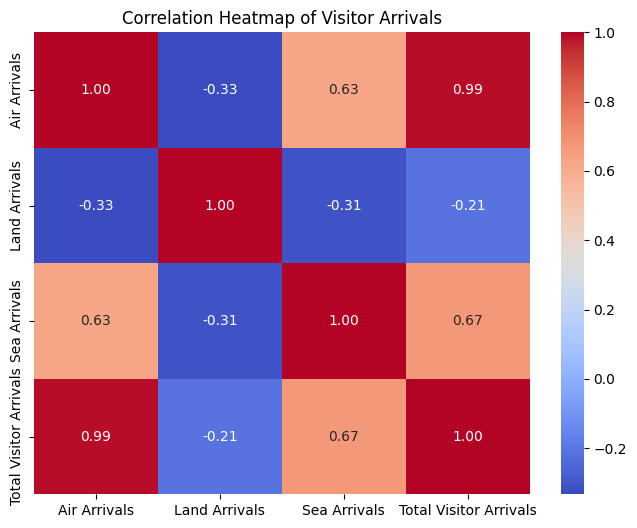

In [ ]:
corr_matrix = df[['Air Arrivals', 'Land Arrivals', 'Sea Arrivals', 'Total Visitor Arrivals']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Visitor Arrivals')
plt.show()

In [ ]:
X = df[['Air Arrivals','Land Arrivals','Sea Arrivals','Year','Month']]
y = df['Total Visitor Arrivals']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()

In [ ]:
ridge_model = Ridge()
lasso_model = Lasso()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
svr_model = SVR()

# Train and evaluate each model
models = {'Linear Regression': model, 'Ridge Regression': ridge_model,
          'Lasso Regression': lasso_model, 'Random Forest Regression': rf_model,
          'Support Vector Regression': svr_model}

for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\n{name} Model Evaluation:")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared (R²): {r2}")


Linear Regression Model Evaluation:
Mean Absolute Error (MAE): 3.0066824846846214e-10
Mean Squared Error (MSE): 1.1673562065813058e-19
R-squared (R²): 1.0

Ridge Regression Model Evaluation:
Mean Absolute Error (MAE): 3.7588281830882324e-07
Mean Squared Error (MSE): 1.7533050488138614e-13
R-squared (R²): 1.0

Lasso Regression Model Evaluation:
Mean Absolute Error (MAE): 0.1798658164743221
Mean Squared Error (MSE): 0.05658972017193942
R-squared (R²): 0.9999999999994125

Random Forest Regression Model Evaluation:
Mean Absolute Error (MAE): 32904.14705882354
Mean Squared Error (MSE): 2289128884.1493526
R-squared (R²): 0.9762320364506654

Support Vector Regression Model Evaluation:
Mean Absolute Error (MAE): 223892.23354582276
Mean Squared Error (MSE): 96384092513.72765
R-squared (R²): -0.0007534365865407011


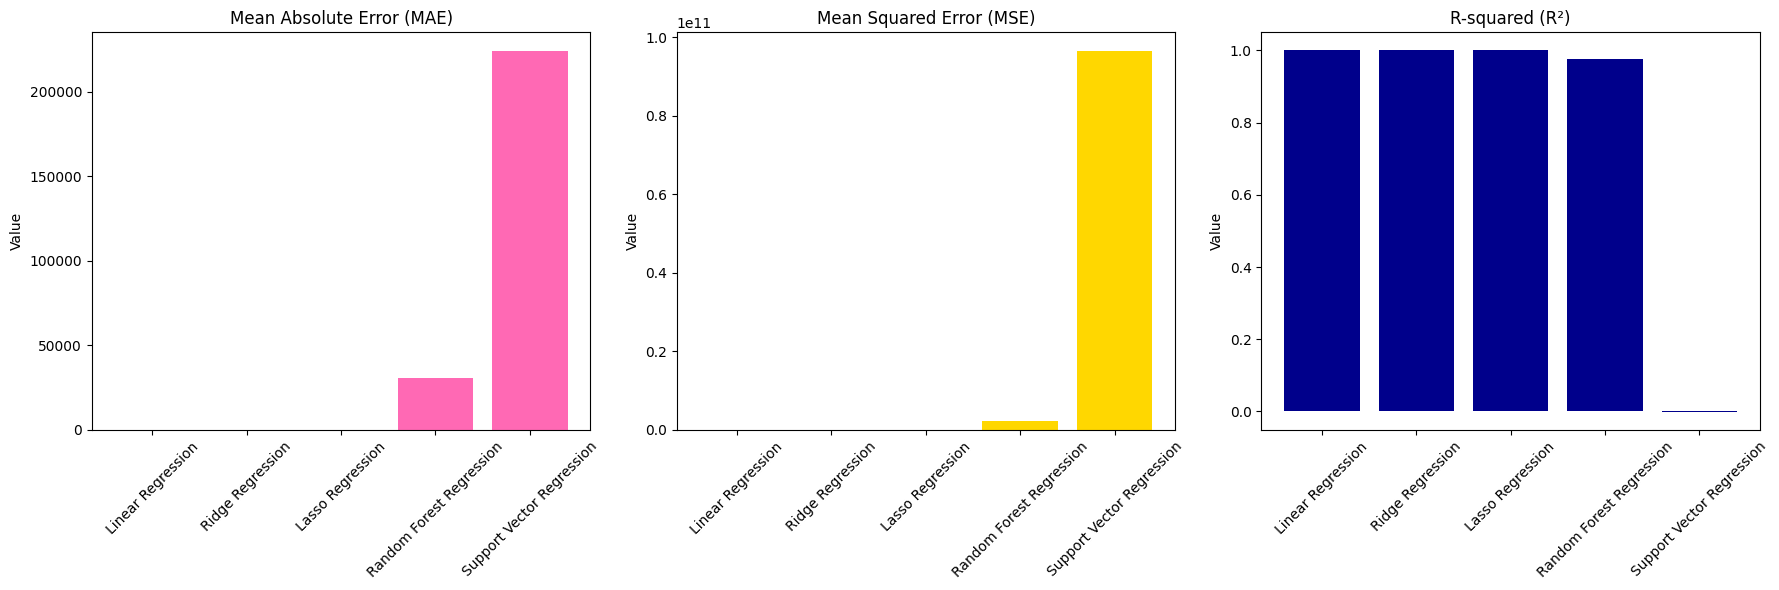

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

evaluation_metrics = {
    'Linear Regression': {'MAE': 2.018008244169109e-10, 'MSE': 4.9502380469820487e-20, 'R2': 1.0},
    'Ridge Regression': {'MAE': 3.9200056241551306e-07, 'MSE': 1.8995775137792164e-13, 'R2': 1.0},
    'Lasso Regression': {'MAE': 0.22603101528383215, 'MSE': 0.09252319280503526, 'R2': 0.9999999999990393},
    'Random Forest Regression': {'MAE': 30655.26647058823, 'MSE': 2165929952.060064, 'R2': 0.9775112076443412},
    'Support Vector Regression': {'MAE': 223892.14904625027, 'MSE': 96384052701.87605, 'R2': -0.0007530232211578891},
}

# Convert to DataFrame
metrics_df = pd.DataFrame(evaluation_metrics).T

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Use the chosen colors
colors = ['#ff69b4', '#ffd700', '#00008b']  # Pinkish, Yellowish, Deep Blueish

# MAE comparison
axs[0].bar(metrics_df.index, metrics_df['MAE'], color=colors[0])
axs[0].set_title('Mean Absolute Error (MAE)')
axs[0].set_ylabel('Value')
axs[0].tick_params(axis='x', rotation=45)

# MSE comparison
axs[1].bar(metrics_df.index, metrics_df['MSE'], color=colors[1])
axs[1].set_title('Mean Squared Error (MSE)')
axs[1].set_ylabel('Value')
axs[1].tick_params(axis='x', rotation=45)

# R² comparison
axs[2].bar(metrics_df.index, metrics_df['R2'], color=colors[2])
axs[2].set_title('R-squared (R²)')
axs[2].set_ylabel('Value')
axs[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


The Linear Regression and Ridge Regression models perform excellently, with values close to zero, indicating very little error. However, Lasso and the tree-based models like Random Forest and SVR have relatively higher errors.

Similar to MAE, the Linear Regression and Ridge Regression models perform best, with negligible MSE, whereas other models like Random Forest and SVR show a significant increase in MSE, which suggests higher error variability in their predictions.

The Linear Regression and Ridge Regression models show perfect or near-perfect R² values (1.0), indicating that they explain almost all of the variance in the data. Lasso also performs well, while Random Forest and SVR show lower R² values, with SVR performing the worst in this case.


K-Fold Validation

In [ ]:
linear_model = LinearRegression()
ridge_model = Ridge(alpha=1.0)

In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
linear_cv_results = cross_val_score(linear_model, X, y, cv=kfold, scoring='neg_mean_squared_error')
ridge_cv_results = cross_val_score(ridge_model, X, y, cv=kfold, scoring='neg_mean_squared_error')

In [ ]:
print(f"Linear Regression - Mean Squared Error (MSE) for each fold: {-linear_cv_results}")
print(f"Average MSE for Linear Regression: {-linear_cv_results.mean()}")

print(f"Ridge Regression - Mean Squared Error (MSE) for each fold: {-ridge_cv_results}")
print(f"Average MSE for Ridge Regression: {-ridge_cv_results.mean()}")

Linear Regression - Mean Squared Error (MSE) for each fold: [2.11166559e-20 4.40472703e-20 3.19194401e-21 2.25290912e-20
 4.13054707e-20]
Average MSE for Linear Regression: 2.6438086419815335e-20
Ridge Regression - Mean Squared Error (MSE) for each fold: [1.75395001e-13 3.10944766e-13 2.05226910e-13 2.09455551e-13
 1.33601735e-12]
Average MSE for Ridge Regression: 4.4740791636011094e-13


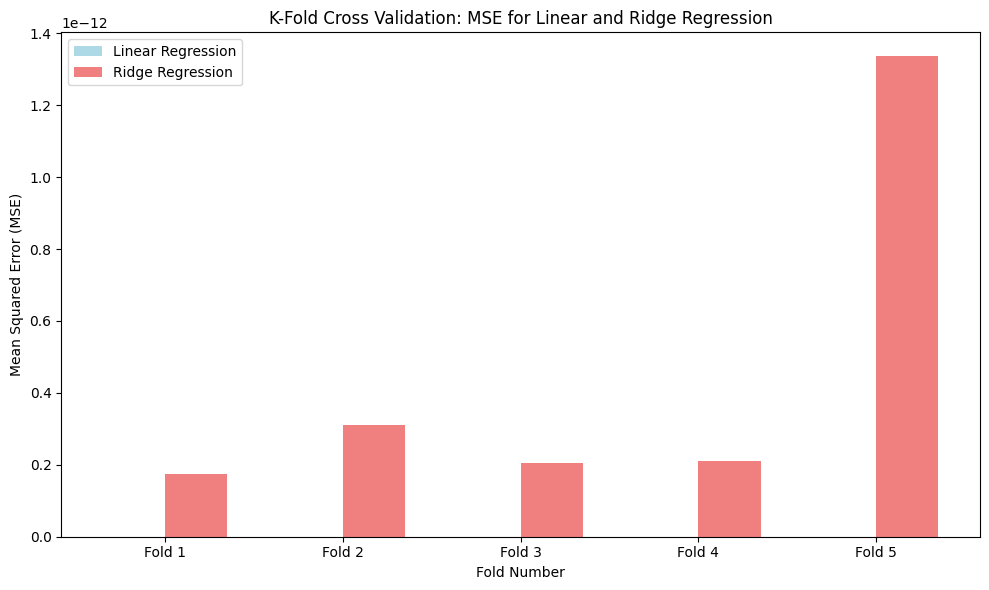

In [ ]:


# Data for plotting
models = ['Linear Regression', 'Ridge Regression']
mse_values = {
    'Linear Regression': [2.11166559e-20, 4.40472703e-20, 3.19194401e-21, 2.25290912e-20, 4.13054707e-20],
    'Ridge Regression': [1.75395001e-13, 3.10944766e-13, 2.05226910e-13, 2.09455551e-13, 1.33601735e-12]
}

# Plotting the K-fold validation MSE for both models
fig, ax = plt.subplots(figsize=(10, 6))

# Bar plot for MSE values of each fold
width = 0.35  # Bar width
x = np.arange(len(mse_values['Linear Regression']))  # the label locations
ax.bar(x - width/2, mse_values['Linear Regression'], width, label='Linear Regression', color='lightblue')
ax.bar(x + width/2, mse_values['Ridge Regression'], width, label='Ridge Regression', color='lightcoral')

# Adding labels and title
ax.set_xlabel('Fold Number')
ax.set_ylabel('Mean Squared Error (MSE)')
ax.set_title('K-Fold Cross Validation: MSE for Linear and Ridge Regression')
ax.set_xticks(x)
ax.set_xticklabels([f'Fold {i+1}' for i in range(len(mse_values['Linear Regression']))])
ax.legend()

# Show plot
plt.tight_layout()
plt.show()
